  default      balance        income  student_No  student_Yes
0      No   729.526495  44361.625074           1            0
1      No   817.180407  12106.134700           0            1
2      No  1073.549164  31767.138947           1            0
3      No   529.250605  35704.493935           1            0
4      No   785.655883  38463.495879           1            0


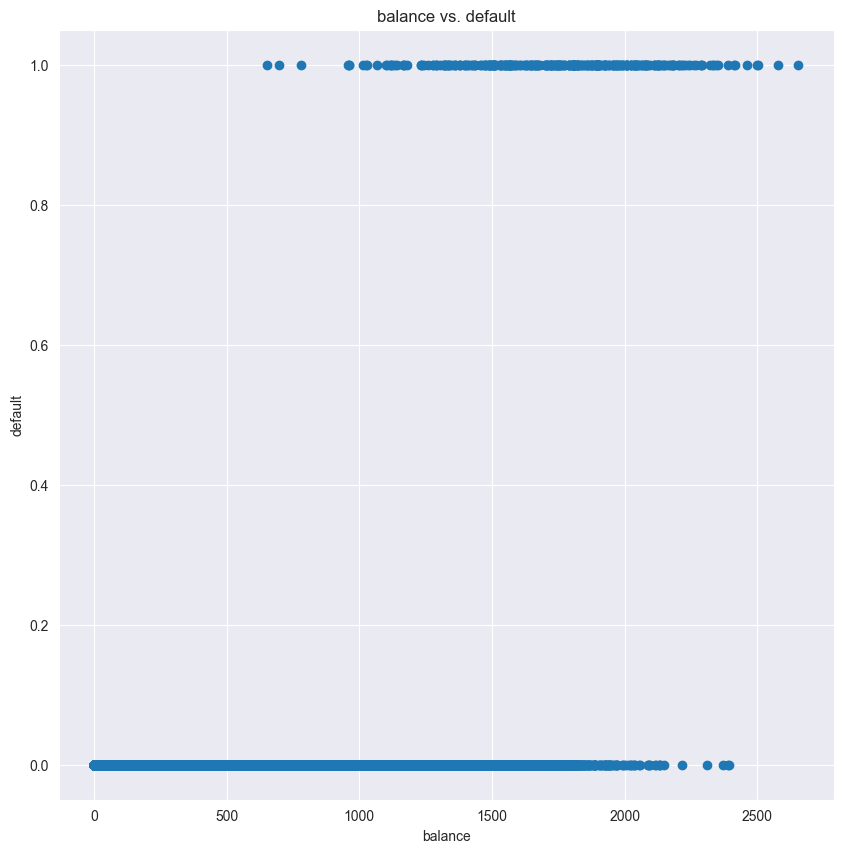

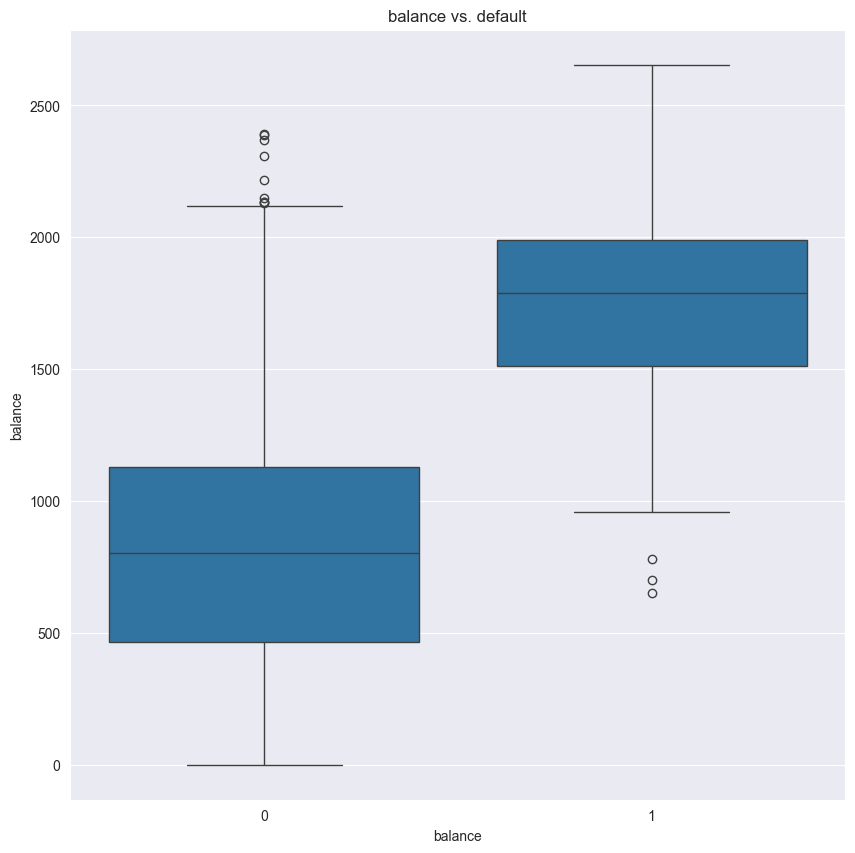

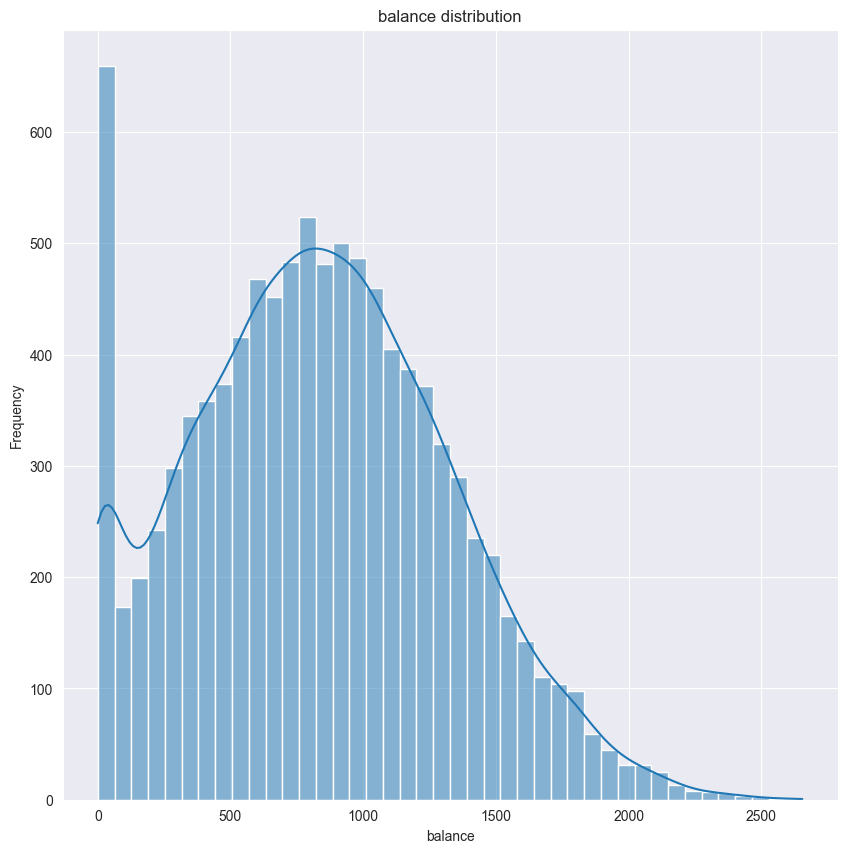

correlation between balance and default: 0.3501192470416942


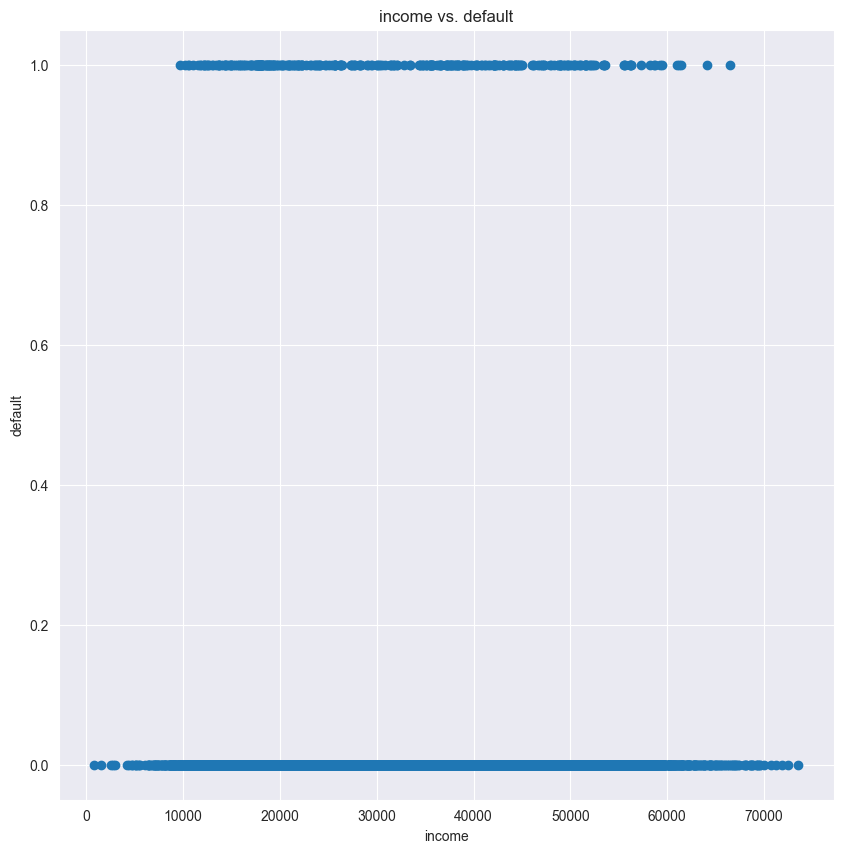

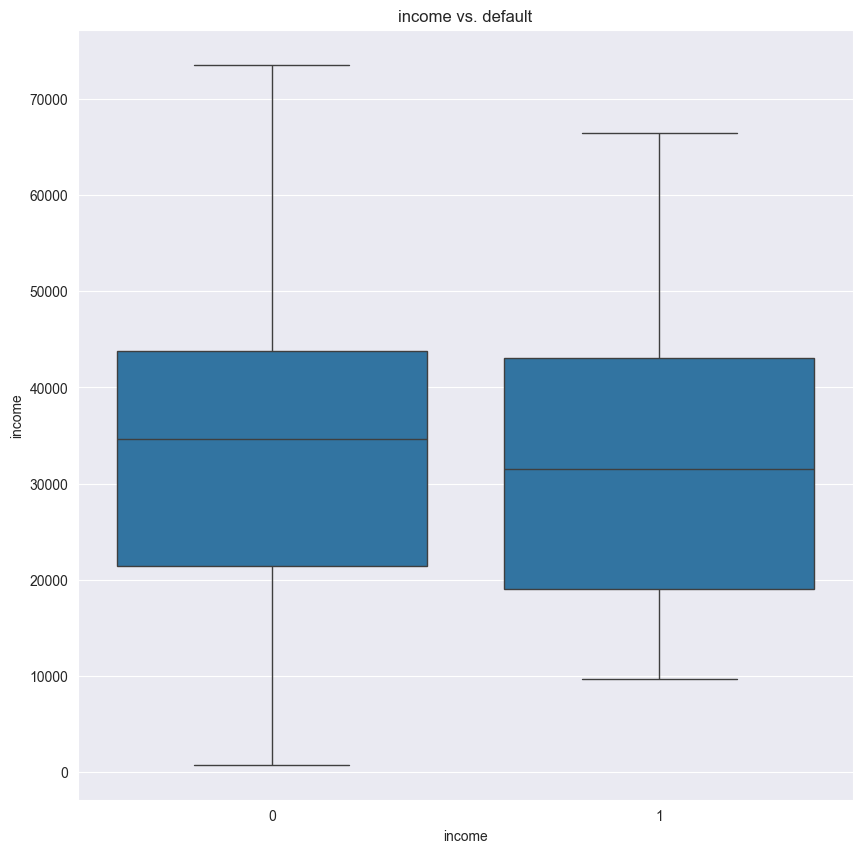

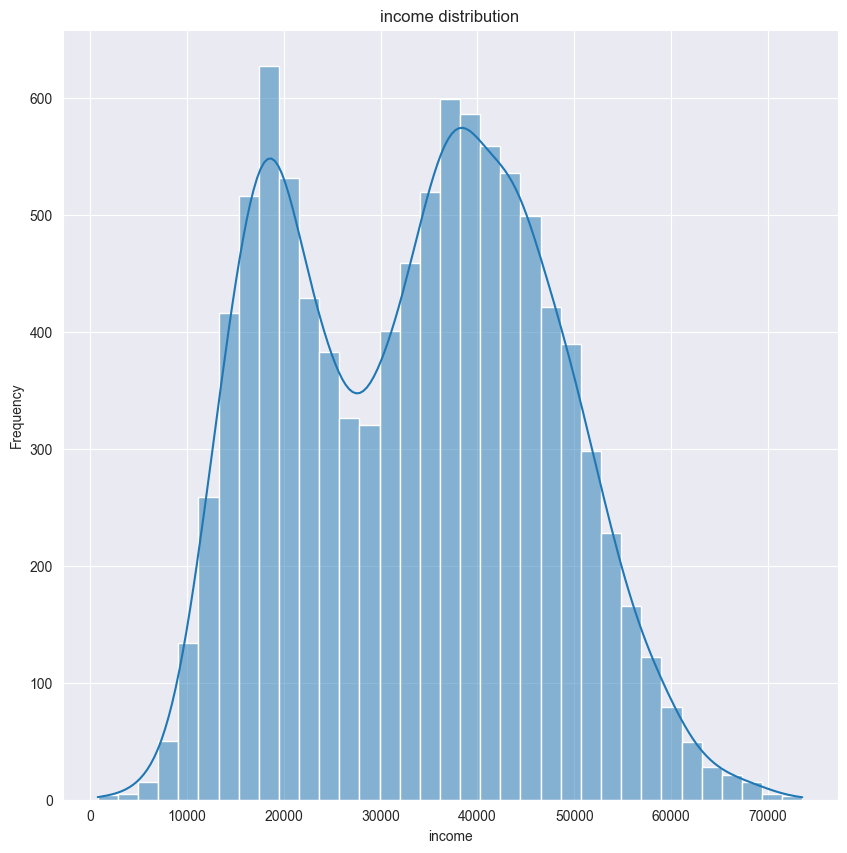

correlation between income and default: -0.019871447656794293


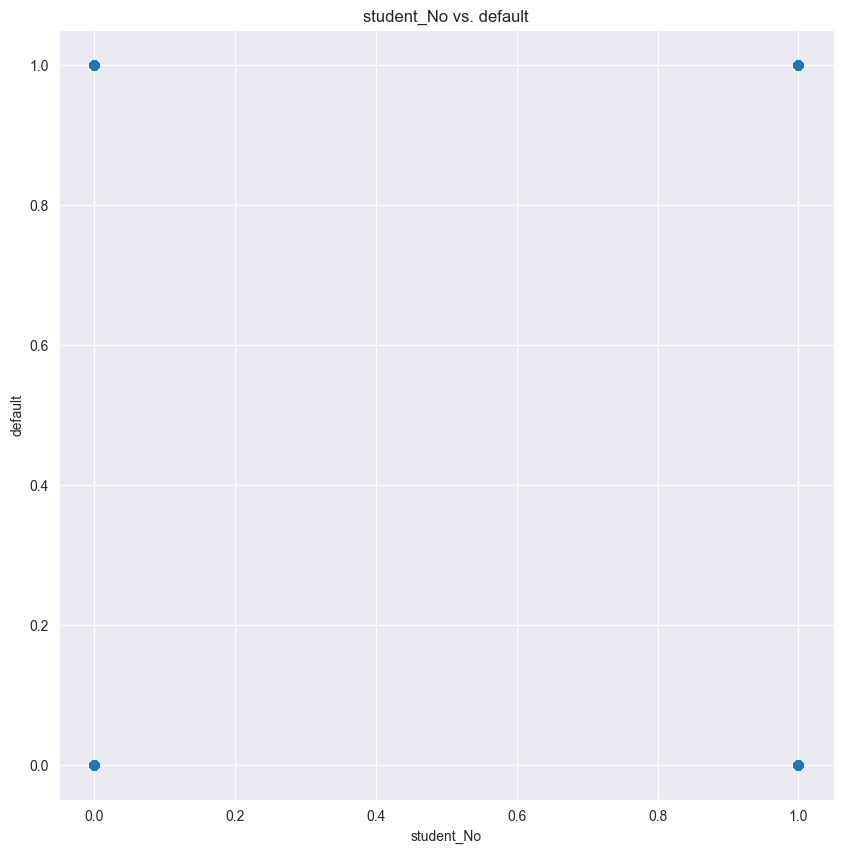

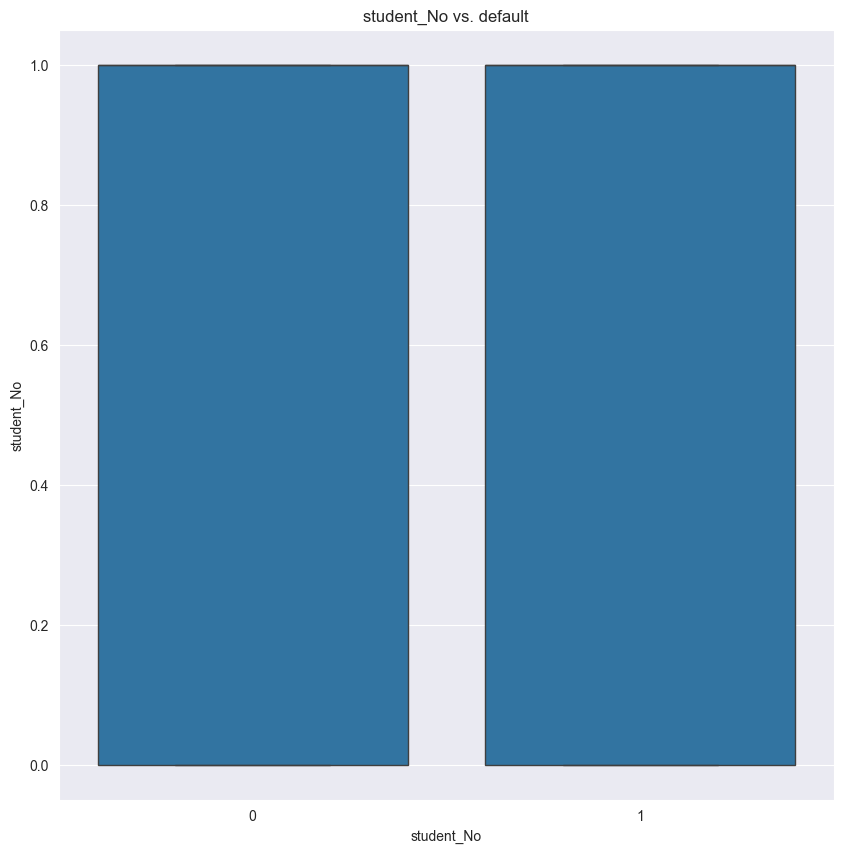

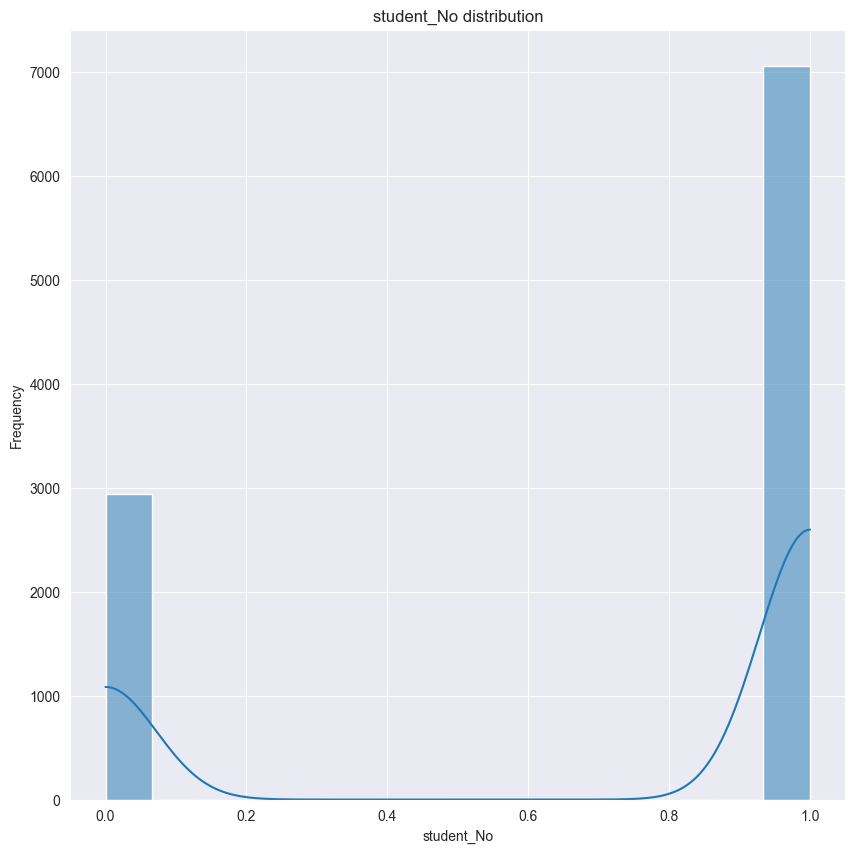

correlation between student_No and default: -0.0354204740379917


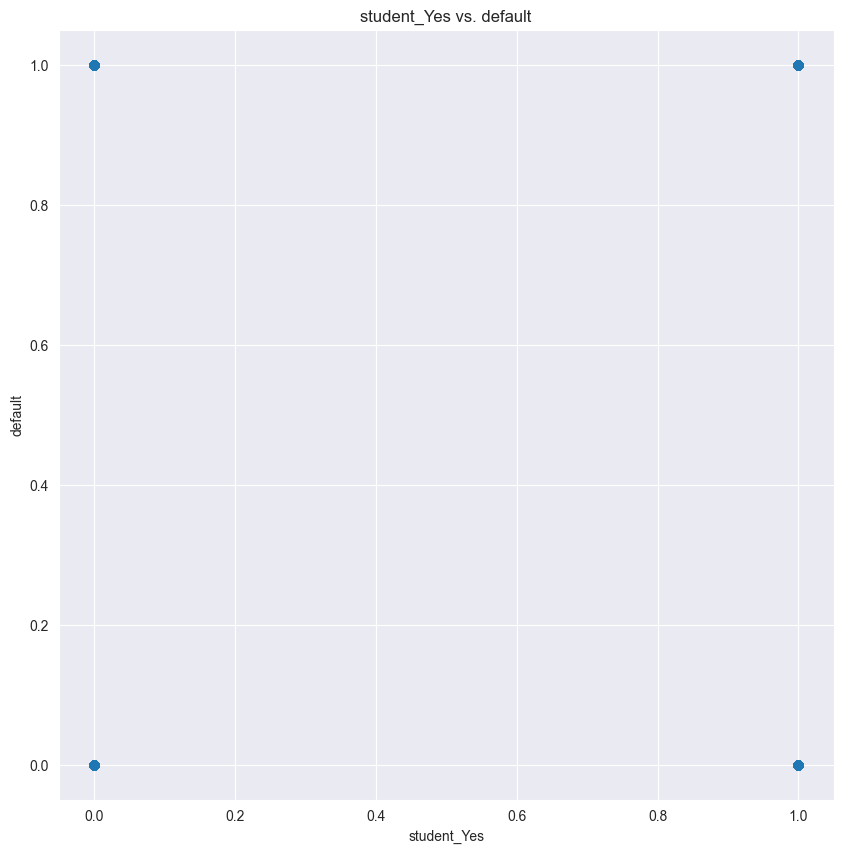

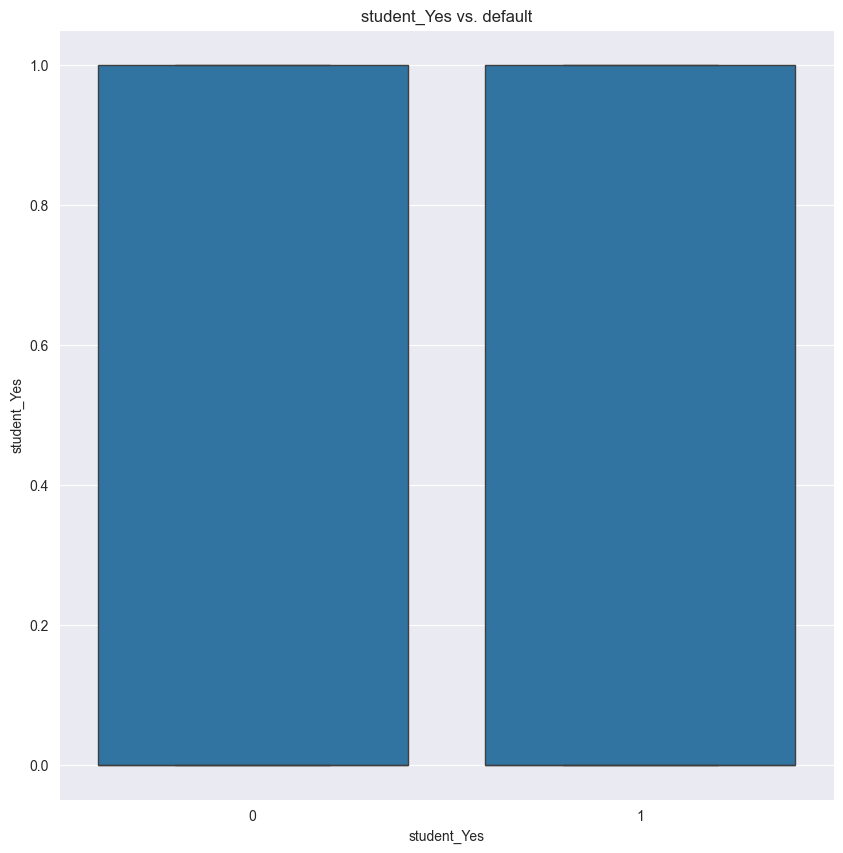

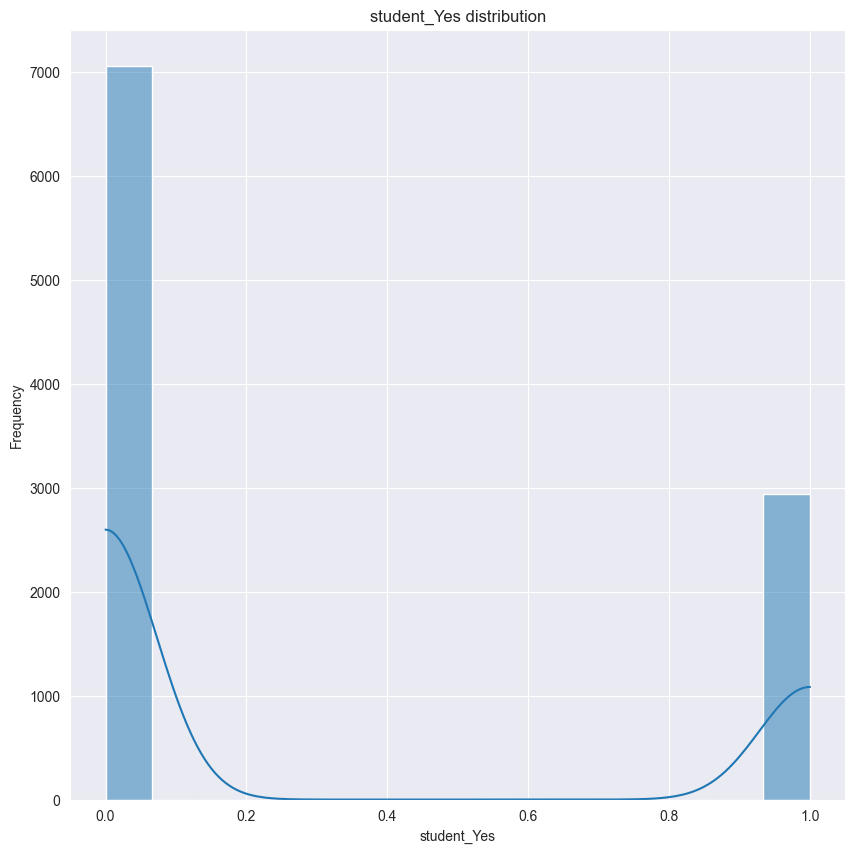

correlation between student_Yes and default: 0.03542047403799173
(8000, 4)
(2000, 4)
(8000,)
(2000,)
         Current function value: 0.080731
         Iterations: 35
         Function evaluations: 56
         Gradient evaluations: 47
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7995
Method:                           MLE   Df Model:                            4
Date:                Wed, 05 Mar 2025   Pseudo R-squ.:                  0.4481
Time:                        22:23:06   Log-Likelihood:                -645.85
converged:                      False   LL-Null:                       -1170.3
Covariance Type:            nonrobust   LLR p-value:                9.181e-226
                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------

In [1]:
import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression as lr
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier as KNN


import warnings
warnings.filterwarnings('ignore') #ignore all warnings


#load data
data = pd.read_csv("Default.csv")
#data = data.drop(['Unamed: 0'], axis=1)
data = pd.get_dummies(data=data, columns=['student'], dtype=int)
print(data.head())

data['default'] =data['default'].map({"No":0, "Yes":1})
def analyze_column(data, column, target_column):
    """Analyze a single column against a target column"""
    plt.figure(figsize=(10,10))
    plt.scatter(data=data, x=column, y=target_column)
    plt.title(f'{column} vs. {target_column}')
    plt.xlabel(column)
    plt.ylabel(target_column)
    plt.show()
    #boxPlot
    plt.figure(figsize=(10,10))
    sns.boxplot(data=data, x=target_column, y=column)
    plt.title(f'{column} vs. {target_column}')
    plt.xlabel(column)
    plt.ylabel(column)
    plt.show()

    #histogra
    plt.figure(figsize=(10,10))
    sns.histplot(data[column], kde=True)
    plt.title(f"{column} distribution")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

    #correlation
    correlation = data[[column, target_column]].corr().iloc[0,1]
    print(f'correlation between {column} and {target_column}: {correlation}')
def analyze_all_columns(data, target_column):
    """Analyze all columns against a target column"""
    feature_column = [col for col in data.columns if col != target_column]
    for column in feature_column:
        analyze_column(data, column, target_column)
analyze_all_columns(data=data, target_column='default')


x = data.drop(['default'], axis=1)
y = data.default
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2, random_state=6)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


#logistic Regression
#add  const on x_train  #don't add constant on y
lr_x_train = sm.add_constant(x_train)
lr_x_test = sm.add_constant(x_test)
lr_x_train.head()
lr_model = sm.Logit(y_train, lr_x_train)
lr_model = lr_model.fit(method="minimize", max_iter=1000)
print(lr_model)
print(lr_model.summary())

y_hat = lr_model.predict(lr_x_test)
predictions = [1 if p > 0.5 else 0 for p in y_hat]
print(y_hat[:10])
print(predictions[:10])

#calculate for accuracy
acc = accuracy_score(y_test, predictions)
print("The accuracy is: ", acc)

#confusion matrix
cm = confusion_matrix(y_test, predictions)
print("The confusion matrix is:", cm)
print()
#SKLEARN IMPLEMENTATION
#create the mode
lr_model =  lr (random_state = 6).fit(x_train, y_train)
prediction = lr_model.predict(x_test)
acc1 = accuracy_score(y_test, prediction)
print("The accuracy is: ", acc1*100, '%')

#confusion matrix
cm1 = confusion_matrix(y_test, predictions)
print("The confusion matrix is:", cm1)
print()
#LINEAR DICRIMINANT ANALYSIS
lda_model = LDA().fit(x_train, y_train)
prediction2 = lda_model.predict(x_test)
acc2 = accuracy_score(y_test, prediction2)
print("The accuracy is: ", acc2*100, '%')

#confusion matrix
cm2 = confusion_matrix(y_test, prediction2)
print("The confusion matrix is:", cm2)
#NAIVE BASE
nb_model = GaussianNB().fit(x_train, y_train)
prediction3 = nb_model.predict(x_test)
acc3 = accuracy_score(y_test, prediction3)
print()
print("The accuracy is: ", acc3*100, '%')
cm3 = confusion_matrix(y_test, prediction3)
print("The confusion matrix is:", cm3)

#KNN MODEL
for k in range (3, 15, 2):
    kn_model = KNN(n_neighbors=k).fit(x_train, y_train)
    prediction4 = kn_model.predict(x_test)
    print("K =", k)
    acc4 = accuracy_score(y_test, prediction4)
    print("The accuracy is: ", acc4*100, '%')
    cm3 = confusion_matrix(y_test, prediction4)
    print("The confusion matrix is:", cm3)
    print()


